# Florida Real Estate Insurance

In [14]:
%matplotlib inline

import zipfile
import numpy as np
import pandas as pd

# description link and file link
# https://support.spatialkey.com/spatialkey-sample-csv-data/
# http://spatialkeydocs.s3.amazonaws.com/FL_insurance_sample.csv.zip

FL = pd.read_csv('FL_insurance_sample.csv')


### Look at the data

In [16]:
FL.head()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
0,119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1
1,448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3
2,206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1
3,333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3
4,172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1


In [2]:
FL.describe()

,policyID,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,point_granularity
count,36634.000000,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,36634.000000,36634.000000,36634.000000,36634.000000,36634.000000
mean,548661.937189,7.314780e+05,2.074348e+06,6.646009e+05,9.911724e+05,2.172875e+06,2.571004e+06,7.787908e+02,7.037985e+03,192.453210,26.483594,28.087477,-81.903565,1.640907
std,259912.926494,1.752300e+07,1.964150e+07,1.746114e+07,1.767178e+07,2.015015e+07,2.036777e+07,4.787979e+04,9.582593e+04,8037.713716,4702.740932,1.647734,1.809066,1.070561
min,100074.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01,7.337000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,24.547514,-87.447290,1.000000
25%,323647.750000,0.000000e+00,4.248106e+04,0.000000e+00,0.000000e+00,4.562415e+04,5.401351e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,26.471996,-82.439331,1.000000
50%,548525.000000,0.000000e+00,1.926911e+05,0.000000e+00,0.000000e+00,2.021051e+05,2.416310e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,28.057077,-81.585700,1.000000
75%,774252.000000,0.000000e+00,9.163381e+05,0.000000e+00,5.741010e+04,9.465821e+05,1.128871e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,29.623005,-80.372910,3.000000
max,999971.000000,2.160000e+09,2.160000e+09,2.160000e+09,2.160000e+09,2.160000e+09,1.701000e+09,6.273765e+06,7.380000e+06,450000.000000,900000.000000,30.989820,-80.033257,7.000000


### Number of policies by county

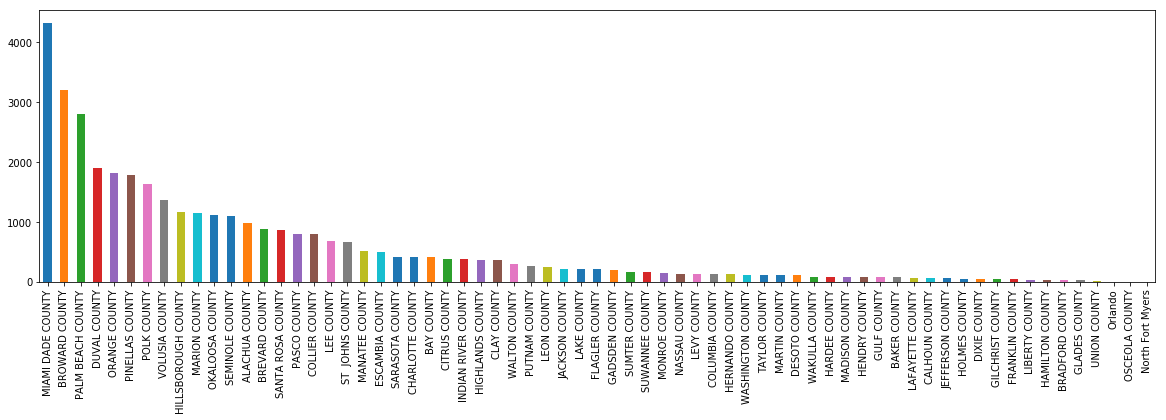

In [3]:
FL.county.value_counts().plot(kind='bar', figsize = (20,5))

### Plotting policies by location, colored by county

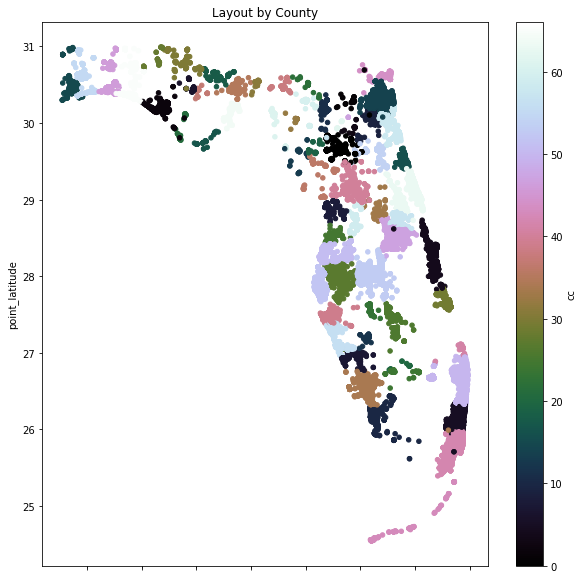

In [21]:

from matplotlib import cm
from matplotlib import *
from sklearn.preprocessing import LabelEncoder

county_coder = LabelEncoder()
FL['cc'] = county_coder.fit_transform(FL['county'])
ax = FL.plot.scatter(
                x='point_longitude', 
                y='point_latitude', 
                c='cc', 
                colormap=cm.cubehelix, 
                figsize=(10,10),
                title='Layout by County'
               )